In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/video_game_reviews.csv')
df.head()

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1


In [4]:
df.shape

(47774, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47774 entries, 0 to 47773
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Game Title               47774 non-null  object 
 1   User Rating              47774 non-null  float64
 2   Age Group Targeted       47774 non-null  object 
 3   Price                    47774 non-null  float64
 4   Platform                 47774 non-null  object 
 5   Requires Special Device  47774 non-null  object 
 6   Developer                47774 non-null  object 
 7   Publisher                47774 non-null  object 
 8   Release Year             47774 non-null  int64  
 9   Genre                    47774 non-null  object 
 10  Multiplayer              47774 non-null  object 
 11  Game Length (Hours)      47774 non-null  float64
 12  Graphics Quality         47774 non-null  object 
 13  Soundtrack Quality       47774 non-null  object 
 14  Story Quality         

In [6]:
df.describe()

,User Rating,Price,Release Year,Game Length (Hours),Min Number of Players
count,47774.000000,47774.000000,47774.000000,47774.000000,47774.000000
mean,29.719329,39.951371,2016.480952,32.481672,5.116758
std,7.550131,11.520342,4.027276,15.872508,2.769521
min,10.100000,19.990000,2010.000000,5.000000,1.000000
25%,24.300000,29.990000,2013.000000,18.800000,3.000000
50%,29.700000,39.845000,2016.000000,32.500000,5.000000
75%,35.100000,49.957500,2020.000000,46.300000,7.000000
max,49.500000,59.990000,2023.000000,60.000000,10.000000


In [7]:
df.isnull().sum()

,0
Game Title,0
User Rating,0
Age Group Targeted,0
Price,0
Platform,0
Requires Special Device,0
Developer,0
Publisher,0
Release Year,0
Genre,0


In [8]:
numerical_cols = df.select_dtypes(include=np.number).columns
category_cols = df.select_dtypes(include='object').columns
numerical_cols, category_cols

(Index(['User Rating', 'Price', 'Release Year', 'Game Length (Hours)',
        'Min Number of Players'],
       dtype='object'),
 Index(['Game Title', 'Age Group Targeted', 'Platform',
        'Requires Special Device', 'Developer', 'Publisher', 'Genre',
        'Multiplayer', 'Graphics Quality', 'Soundtrack Quality',
        'Story Quality', 'User Review Text', 'Game Mode'],
       dtype='object'))

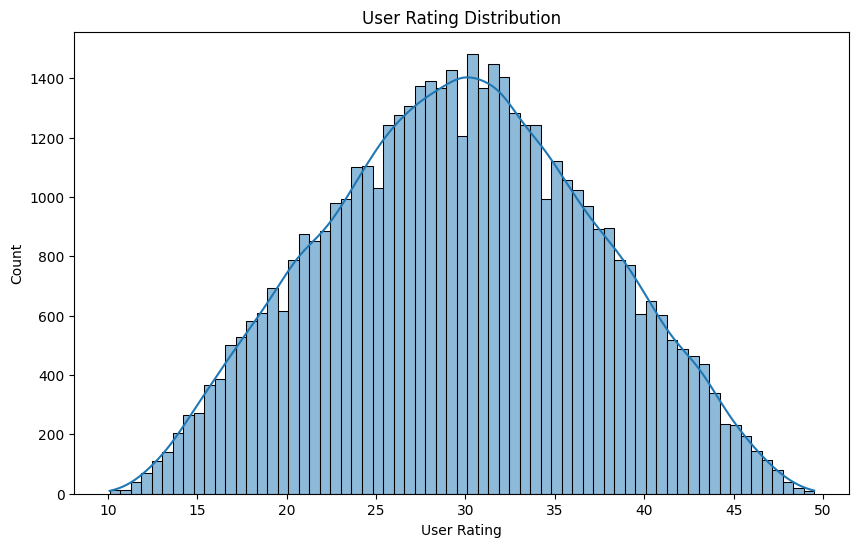

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df['User Rating'], kde=True)
plt.title('User Rating Distribution')
plt.show()

In [10]:
df.isna().sum()

,0
Game Title,0
User Rating,0
Age Group Targeted,0
Price,0
Platform,0
Requires Special Device,0
Developer,0
Publisher,0
Release Year,0
Genre,0


In [11]:
from sklearn.impute import SimpleImputer
imputer_num = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

imputer_cat = SimpleImputer(strategy='most_frequent')
df[category_cols] = imputer_cat.fit_transform(df[category_cols])
df = df.drop('Game Title', axis=1)

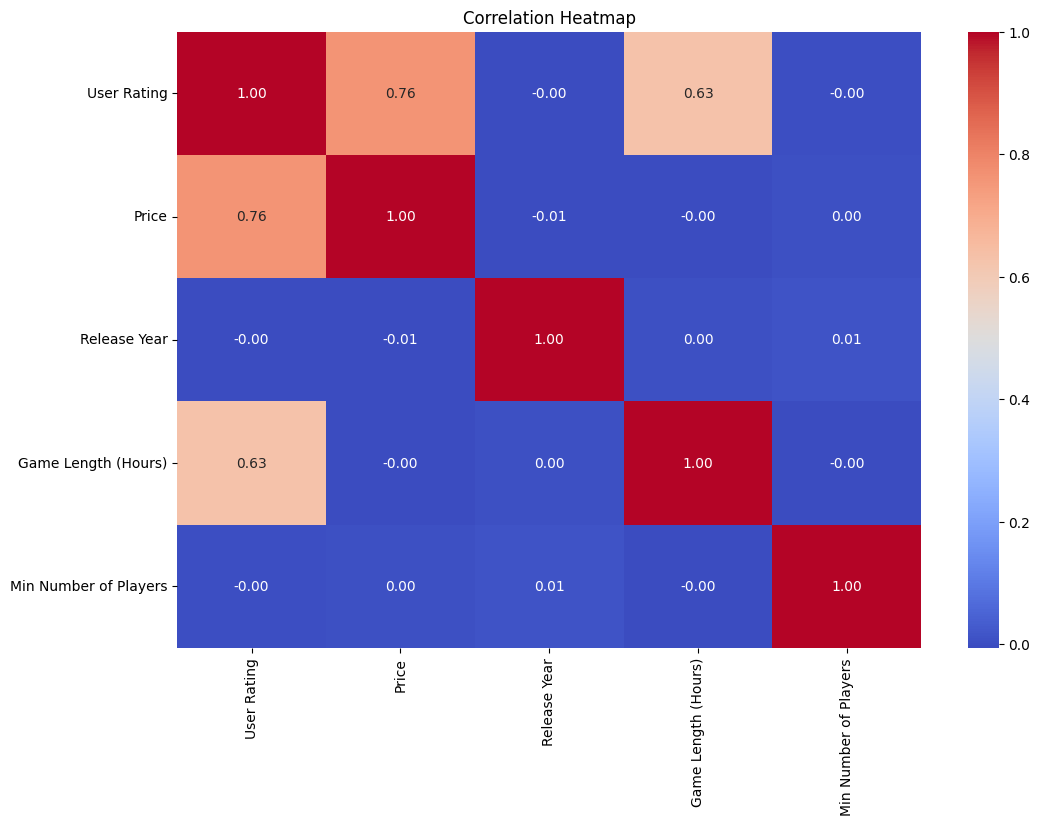

In [12]:
# Visualize correlation between numerical columns
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

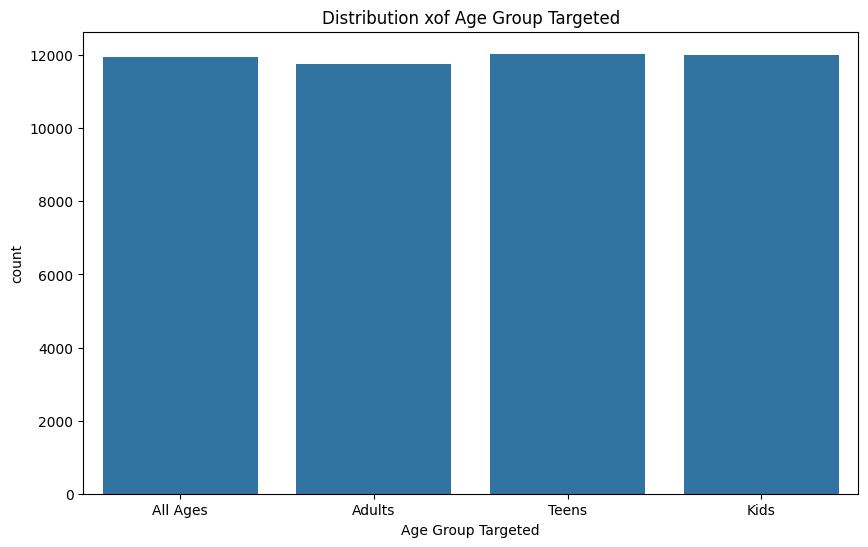

In [13]:
# EDA: Check distribution of categorical variables (e.g., Age Group, Genre, Platform)
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Age Group Targeted')
plt.title('Distribution xof Age Group Targeted')
plt.show()

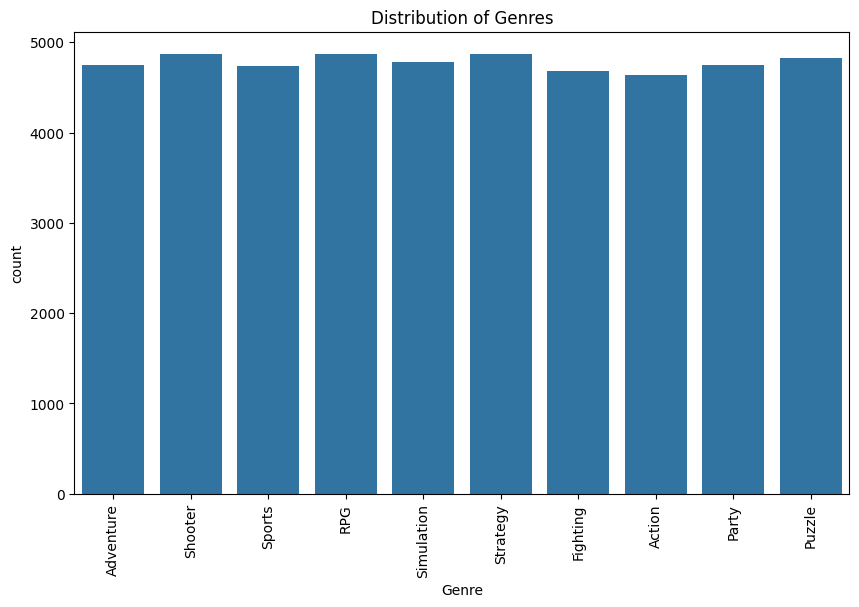

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Genre')
plt.title('Distribution of Genres')
plt.xticks(rotation=90)
plt.show()

In [15]:
!pip install catboost==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.6 MB/s eta 0:00:00


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor

In [17]:
df_encoded = pd.get_dummies(df, columns=['Age Group Targeted', 'Platform', 'Genre', 'Developer', 'Publisher'], drop_first=True)

# For columns with fewer unique categories, we can use Label Encoding
le = LabelEncoder()
df_encoded['Game Mode'] = le.fit_transform(df_encoded['Game Mode'])

# Splitting the data into features and target
X = df_encoded.drop('User Rating', axis=1)  # Features
y = df_encoded['User Rating']  # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.head(5)

,Price,Requires Special Device,Release Year,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,...,Developer_Rockstar Games,Developer_Valve,Publisher_Capcom,Publisher_Electronic Arts,Publisher_Epic Games,Publisher_Innersloth,Publisher_Nintendo,Publisher_Square Enix,Publisher_Take-Two Interactive,Publisher_Valve
26313,26.29,No,2023.0,Yes,44.6,Ultra,Excellent,Average,"Disappointing game, but the graphics could be ...",0,...,False,False,False,False,False,False,False,False,False,True
38906,55.98,Yes,2021.0,No,47.0,Ultra,Excellent,Good,"Solid game, but too many bugs.",1,...,False,False,False,False,False,False,False,False,False,True
16380,39.77,Yes,2010.0,No,21.0,Low,Poor,Average,"Amazing game, but too many bugs.",0,...,False,False,False,False,False,False,True,False,False,False
36946,24.93,Yes,2021.0,No,13.5,High,Average,Poor,"Solid game, but the gameplay is amazing.",1,...,False,False,False,False,False,False,False,False,True,False
26125,43.48,Yes,2019.0,Yes,12.1,Medium,Excellent,Average,"Solid game, but the graphics could be better.",1,...,False,False,True,False,False,False,False,False,False,False


In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38219 entries, 26313 to 15795
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Price                           38219 non-null  float64
 1   Requires Special Device         38219 non-null  object 
 2   Release Year                    38219 non-null  float64
 3   Multiplayer                     38219 non-null  object 
 4   Game Length (Hours)             38219 non-null  float64
 5   Graphics Quality                38219 non-null  object 
 6   Soundtrack Quality              38219 non-null  object 
 7   Story Quality                   38219 non-null  object 
 8   User Review Text                38219 non-null  object 
 9   Game Mode                       38219 non-null  int64  
 10  Min Number of Players           38219 non-null  float64
 11  Age Group Targeted_All Ages     38219 non-null  bool   
 12  Age Group Targeted_Kids         3

In [20]:
X_train = X_train.select_dtypes(exclude=['object'])
X_test = X_test.select_dtypes(exclude=['object'])

In [21]:
# Machine Learning Models

## 1. Linear Regression
print("Training Linear Regression Model")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

Training Linear Regression Model


LinearRegression()

In [22]:
y_pred_lr = lr_model.predict(X_test)

lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Linear Regression R2: {lr_r2}")

Linear Regression RMSE: 1.157477301168222
Linear Regression R2: 0.9768628463682065


In [23]:
## 2. Random Forest Regressor
print("Training Random Forest Model")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R2: {rf_r2}")

Training Random Forest Model
Random Forest RMSE: 1.2127517255731657
Random Forest R2: 0.9746002894911431


In [24]:
## 3. CatBoost Regressor
print("Training CatBoost Model")
catboost_model = CatBoostRegressor(iterations=200, learning_rate=0.1, depth=7, random_state=42, silent=True)
catboost_model.fit(X_train, y_train)

# Predicting
y_pred_catboost = catboost_model.predict(X_test)

Training CatBoost Model


In [25]:
# Evaluating the model
catboost_rmse = np.sqrt(mean_squared_error(y_test, y_pred_catboost))
catboost_r2 = r2_score(y_test, y_pred_catboost)
print(f"CatBoost RMSE: {catboost_rmse}")
print(f"CatBoost R2: {catboost_r2}")

CatBoost RMSE: 1.1700511825134468
CatBoost R2: 0.9763574299722126


In [26]:
# Conclusion
print(f"Best Model: {'CatBoost' if catboost_r2 > max(lr_r2, rf_r2) else 'Random Forest' if rf_r2 > lr_r2 else 'Linear Regression'}")

Best Model: Linear Regression
